In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np


In [3]:

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/federate/data.csv")  # Update with your file path



In [4]:
df.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [5]:
# Drop unnecessary column
df = df.drop(columns=["Patient_ID"])



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Identify categorical and numerical columns
categorical_cols = ["Gender", "Disease_Type", "Severity", "Physical_Activity_Level",
                    "Dietary_Restrictions", "Allergies", "Preferred_Cuisine"]
numerical_cols = ["Age", "Weight_kg", "Height_cm", "BMI", "Daily_Caloric_Intake",
                  "Cholesterol_mg/dL", "Blood_Pressure_mmHg", "Glucose_mg/dL",
                  "Weekly_Exercise_Hours", "Adherence_to_Diet_Plan", "Dietary_Nutrient_Imbalance_Score"]

In [8]:
print(df.columns)


Index(['Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Disease_Type',
       'Severity', 'Physical_Activity_Level', 'Daily_Caloric_Intake',
       'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL',
       'Dietary_Restrictions', 'Allergies', 'Preferred_Cuisine',
       'Weekly_Exercise_Hours', 'Adherence_to_Diet_Plan',
       'Dietary_Nutrient_Imbalance_Score', 'Diet_Recommendation'],
      dtype='object')


In [9]:
print(df.isnull().sum())


Age                                   0
Gender                                0
Weight_kg                             0
Height_cm                             0
BMI                                   0
Disease_Type                        204
Severity                              0
Physical_Activity_Level               0
Daily_Caloric_Intake                  0
Cholesterol_mg/dL                     0
Blood_Pressure_mmHg                   0
Glucose_mg/dL                         0
Dietary_Restrictions                334
Allergies                           323
Preferred_Cuisine                     0
Weekly_Exercise_Hours                 0
Adherence_to_Diet_Plan                0
Dietary_Nutrient_Imbalance_Score      0
Diet_Recommendation                   0
dtype: int64


<ipython-input-10-8d1d9ee0e083>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


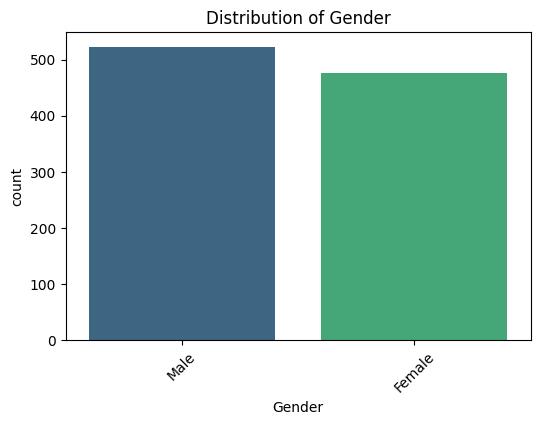

<ipython-input-10-8d1d9ee0e083>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


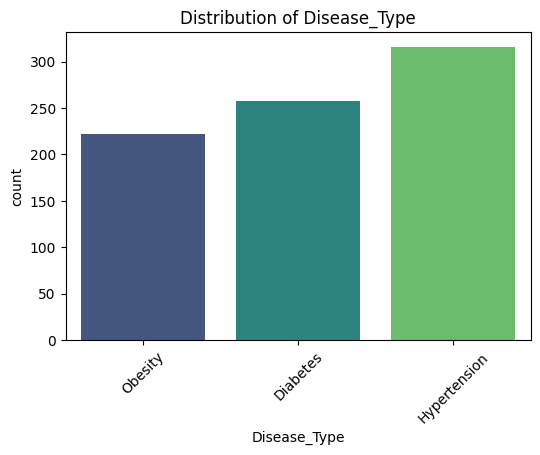

<ipython-input-10-8d1d9ee0e083>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


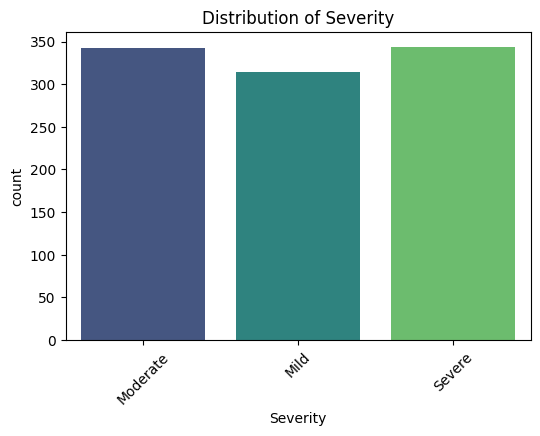

<ipython-input-10-8d1d9ee0e083>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


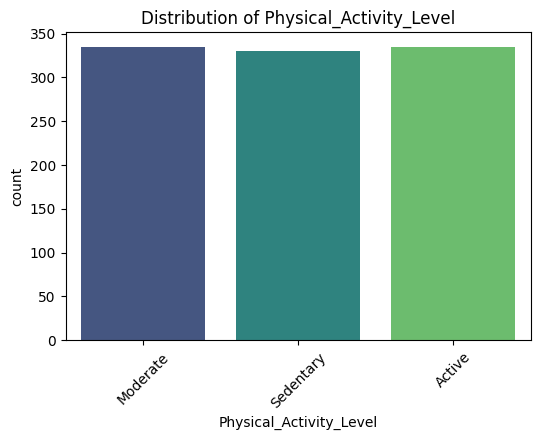

<ipython-input-10-8d1d9ee0e083>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


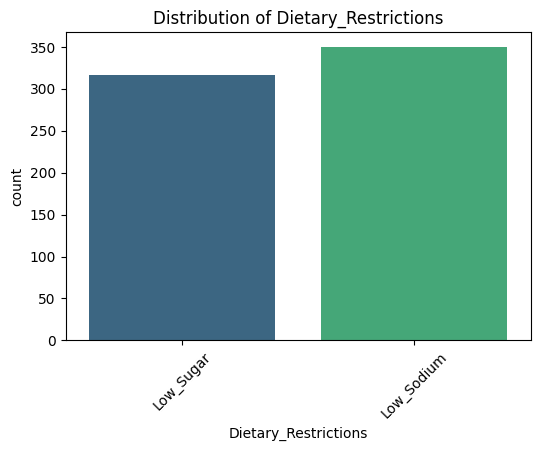

<ipython-input-10-8d1d9ee0e083>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


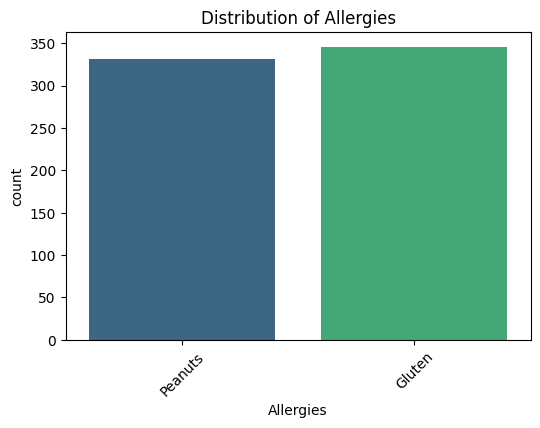

<ipython-input-10-8d1d9ee0e083>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


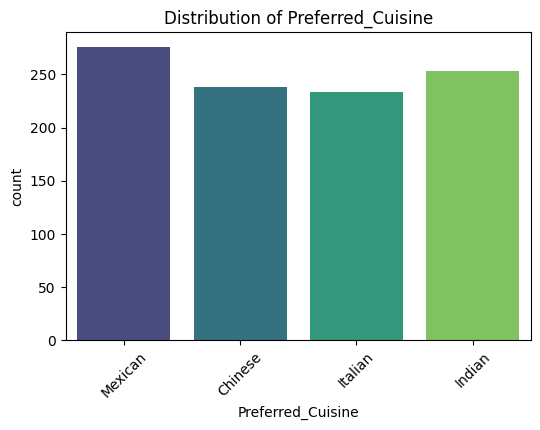

In [10]:
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, palette="viridis")
        plt.xticks(rotation=45)
        plt.title(f"Distribution of {col}")
        plt.show()
    else:
        print(f"Warning: {col} not found in dataset.")


<ipython-input-11-e33a1e4c8a2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
<ipython-input-11-e33a1e4c8a2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
<ipython-input-11-e33a1e4c8a2c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

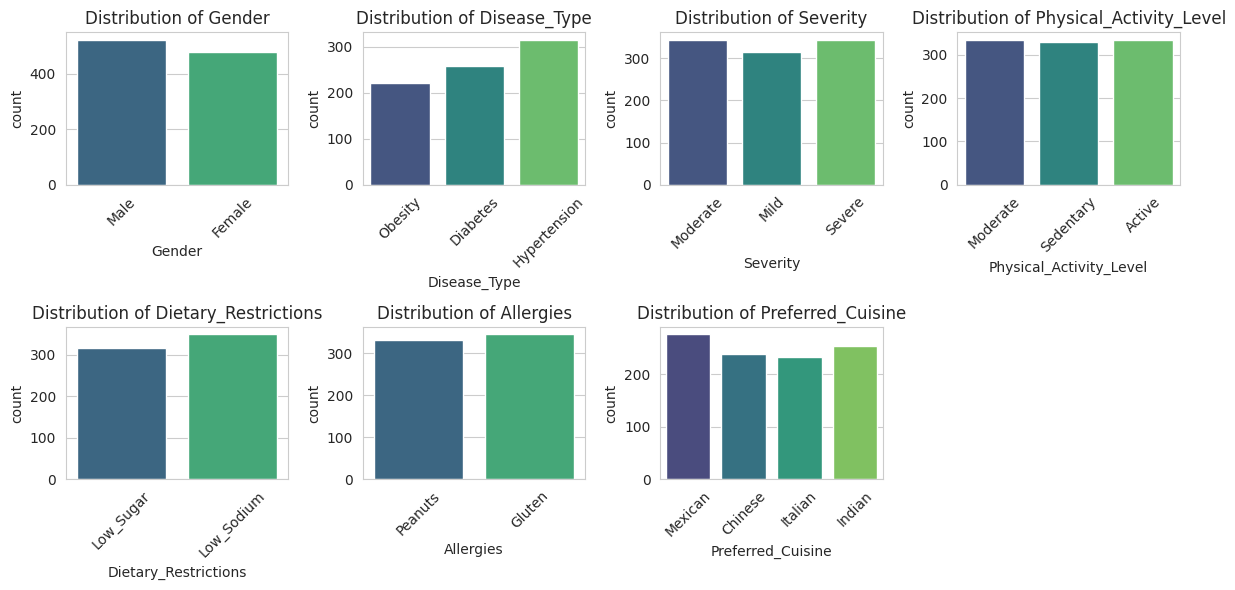

In [11]:
df = df[[col for col in categorical_cols + numerical_cols if col in df.columns]]

# Convert numerical columns to numeric type (if needed)
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values (fill with median for numerical)
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Set Seaborn style
sns.set_style("whitegrid")

# 1. Categorical Columns: Count Plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    if col in df.columns:
        plt.subplot(2, 4, i + 1)
        sns.countplot(data=df, x=col, palette="viridis")
        plt.xticks(rotation=45)
        plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()



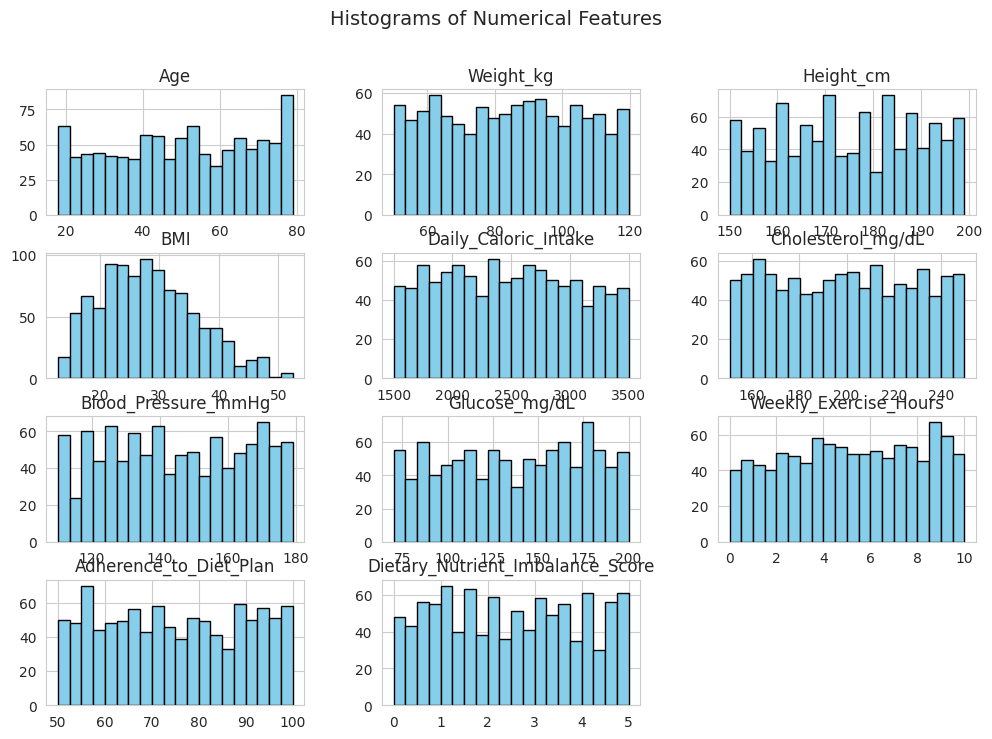

In [12]:
# 2. Numerical Columns: Histograms
df[numerical_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()



<ipython-input-13-4d5b49be6328>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="coolwarm")
<ipython-input-13-4d5b49be6328>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="coolwarm")
<ipython-input-13-4d5b49be6328>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="coolwarm")
<ipython-input-13-4d5b49be6328>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

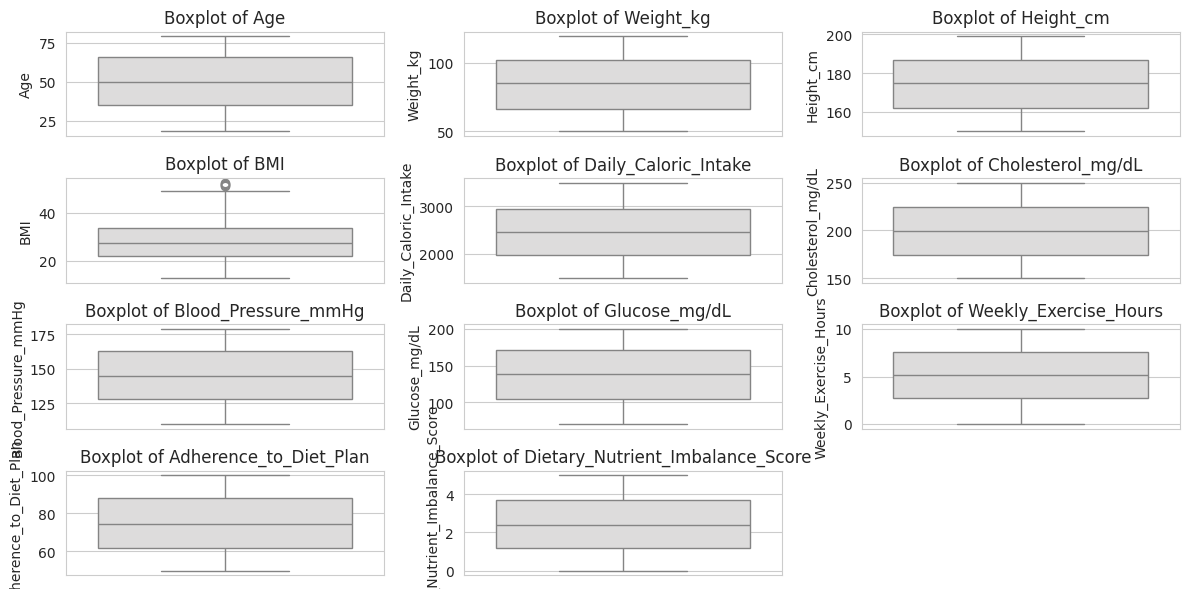

In [13]:
# 3. Boxplots for Outlier Detection
rows = (len(numerical_cols) // 3) + 1
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(data=df, y=col, palette="coolwarm")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


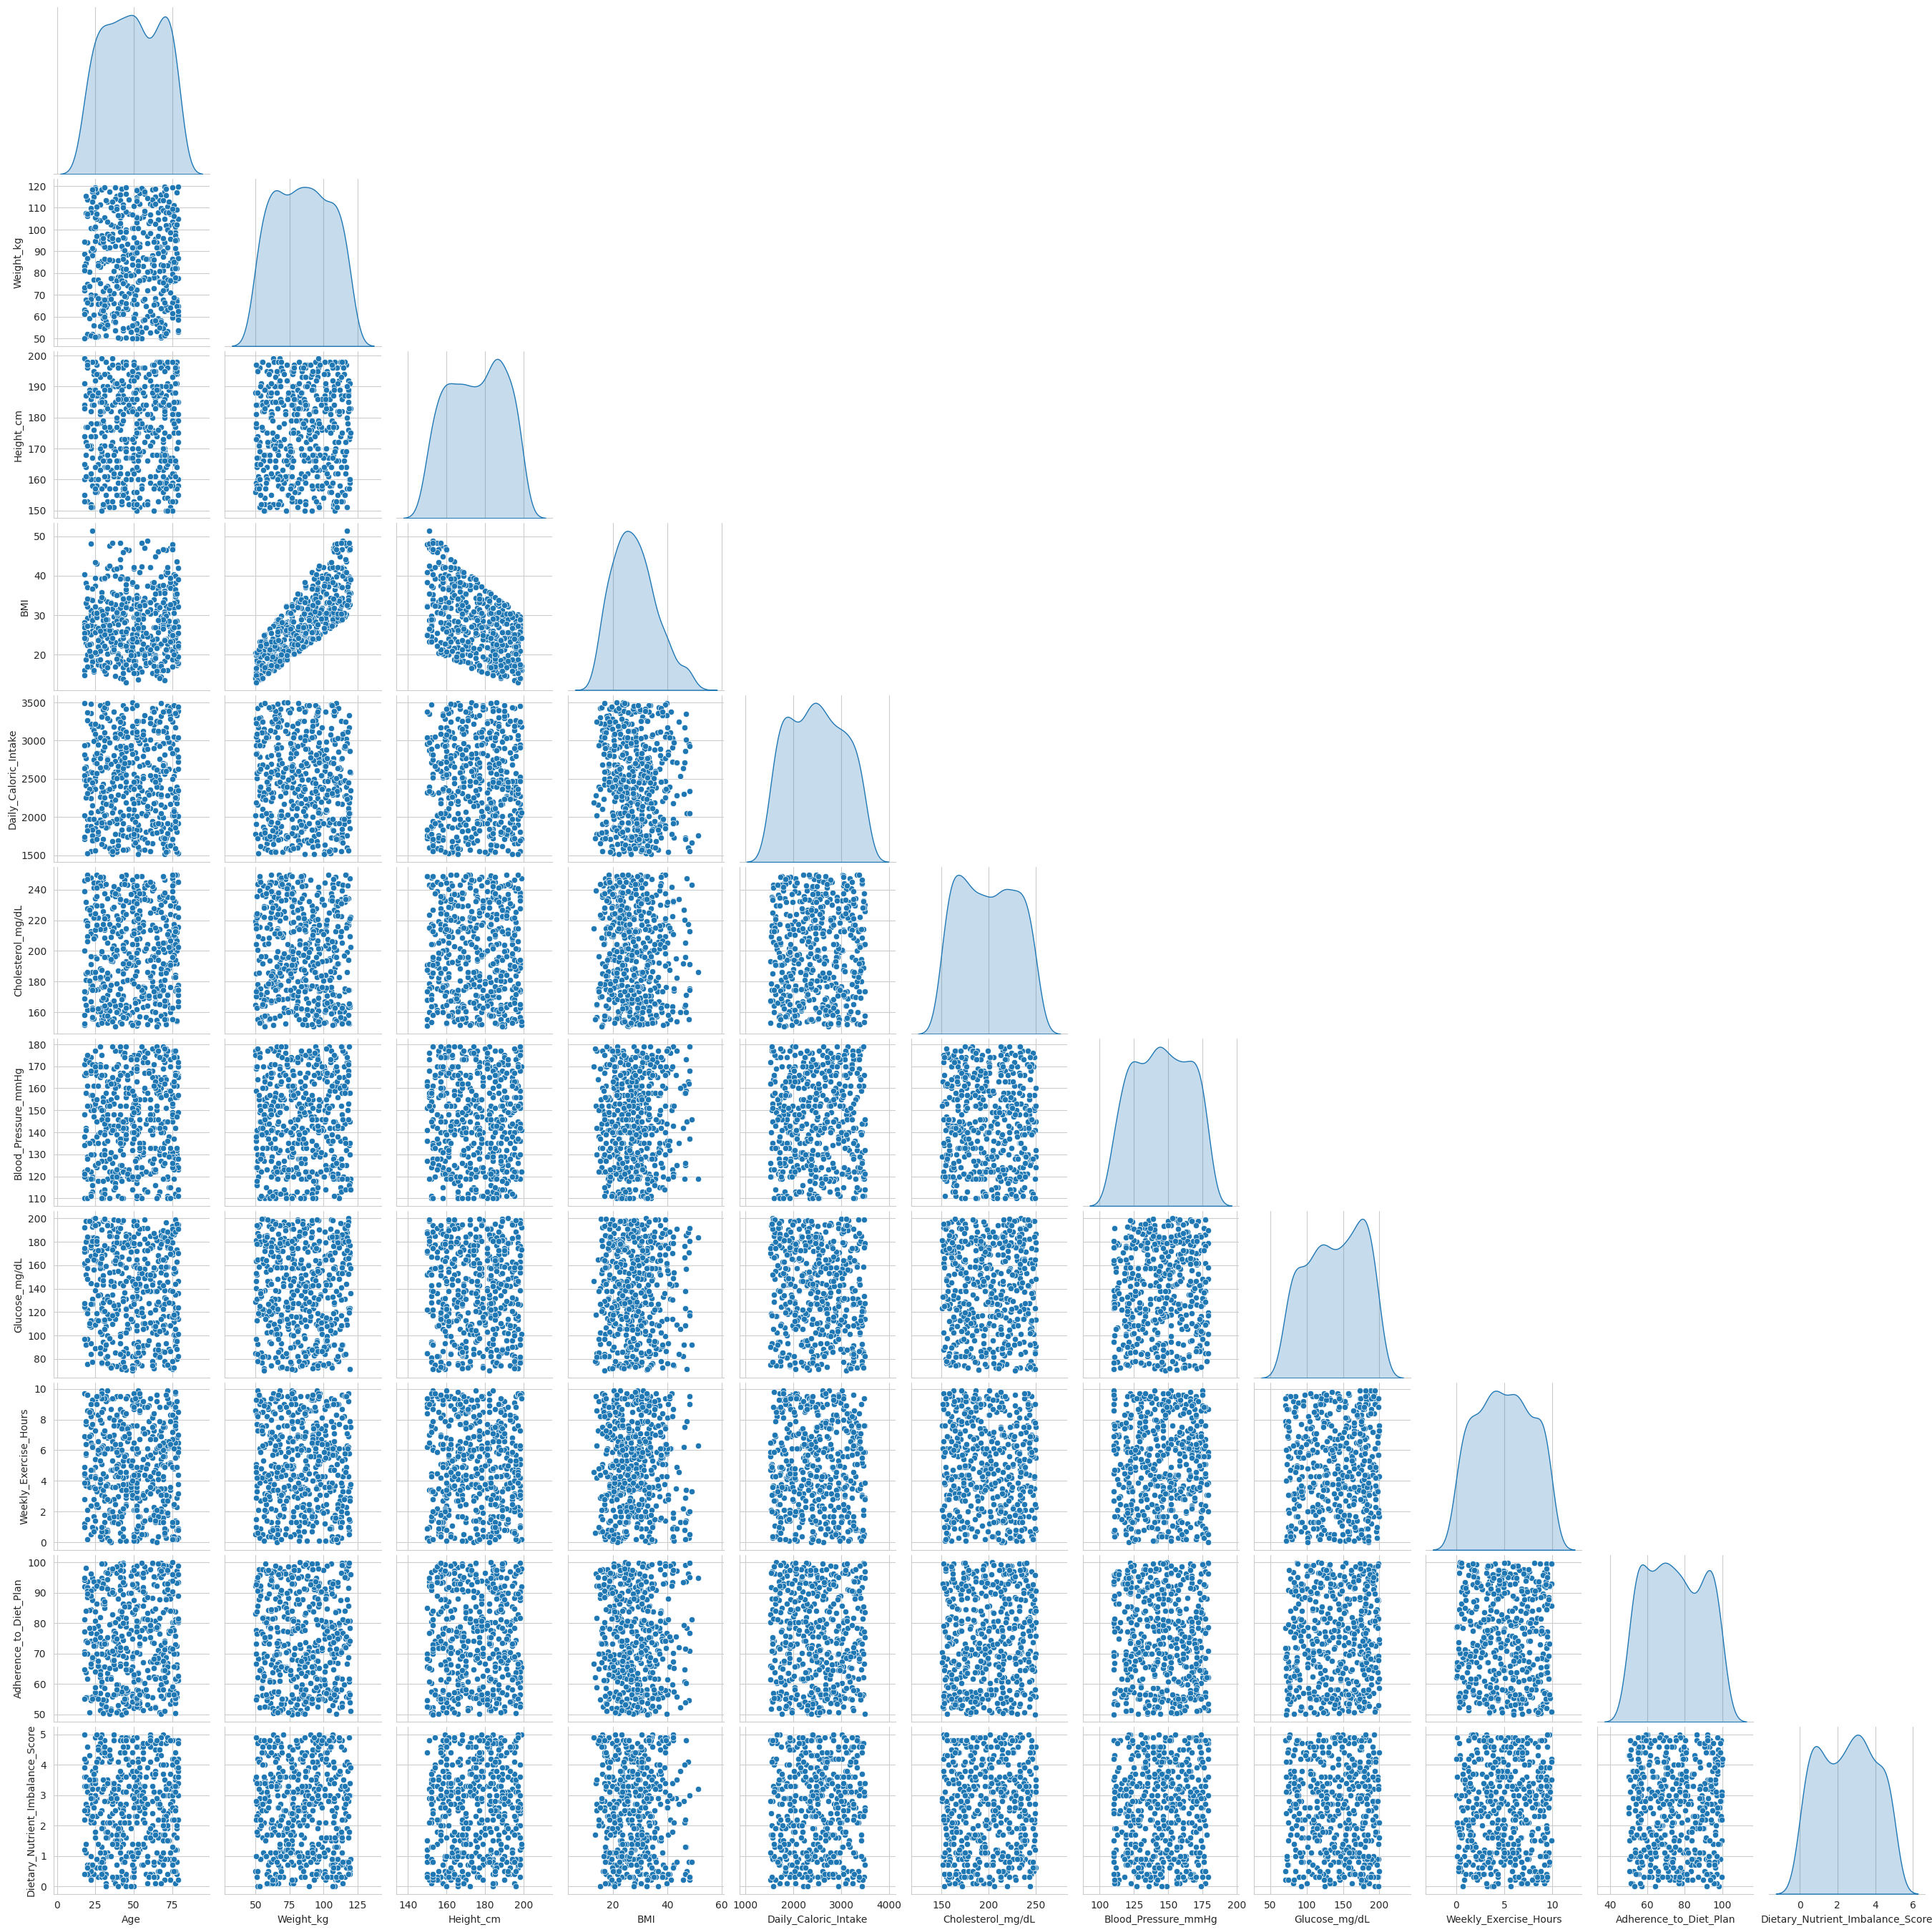

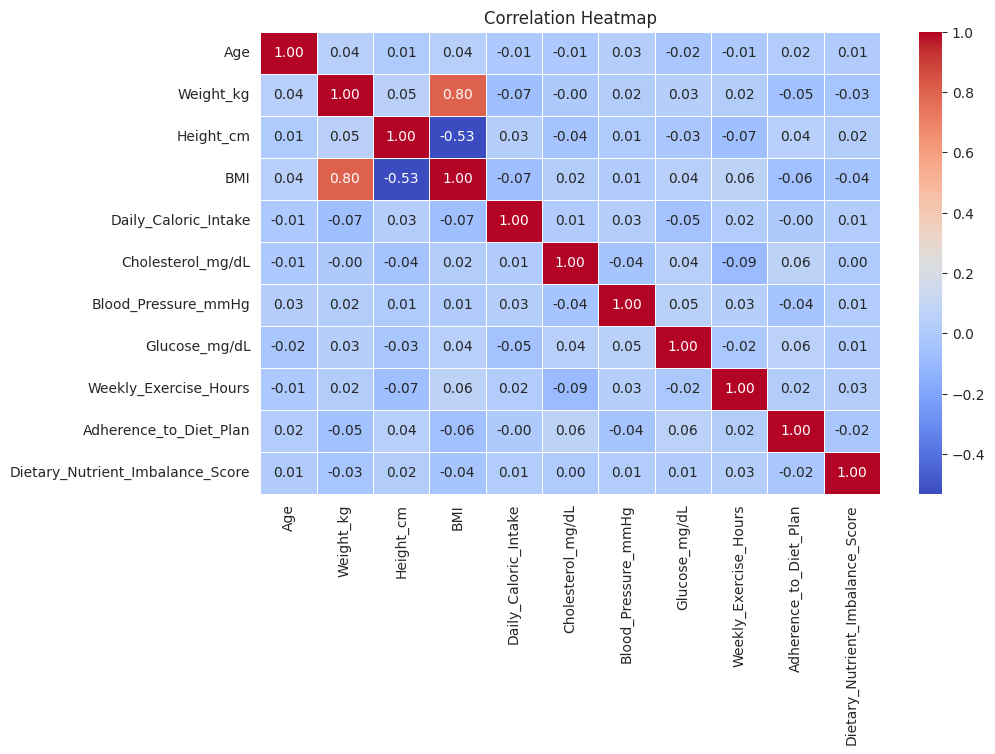

In [14]:

# 4. Pairplot for Relationships (Use a sample if dataset is large)
if len(df) > 500:
    sample_df = df.sample(500, random_state=42)
else:
    sample_df = df
sns.pairplot(sample_df[numerical_cols], diag_kind='kde', corner=True)
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
# One-hot encode target variable
# Check if 'Disease_Type' is in the DataFrame columns
if 'Disease_Type' in df.columns:
    ohe = OneHotEncoder(sparse_output=False)  # Replace sparse with sparse_output
    target_encoded = ohe.fit_transform(df[['Disease_Type']])
    target_labels = ohe.categories_[0]
else:
    print("Error: 'Disease_Type' column not found in DataFrame.")
    # Add debugging steps to find where the column was lost or renamed
    print("Current DataFrame columns:", df.columns)

In [18]:
# Convert target variable to DataFrame
target_df = pd.DataFrame(target_encoded, columns=target_labels)

# Merge encoded target variable with features
# df = df.drop(columns=[""])  # Remove this line or replace with the actual column name to drop
df = pd.concat([df, target_df], axis=1)

In [19]:
# Split dataset into clients
def split_clients(data, num_clients=5):
    client_datasets = np.array_split(data.sample(frac=1), num_clients)
    return client_datasets

client_data = split_clients(df, num_clients=5)

# Convert client datasets to TFF format
def create_tff_dataset(client_dataset):
    return tf.data.Dataset.from_tensor_slices((
        client_dataset.drop(columns=target_labels).values.astype(np.float32),
        client_dataset[target_labels].values.astype(np.float32)
    )).batch(16)

federated_train_data = [create_tff_dataset(client) for client in client_data]

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
